In [2]:
import string
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
df = pd.read_csv("dataset.csv");
df.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [4]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [10]:
def remove_punctuation(text):
    for pun in string.punctuation:
        text = text.replace(pun, "")
    text = text.lower()
    return text

In [12]:
df["Text"] = df["Text"].apply(remove_punctuation)

In [13]:
df.head()

,Text,Language
0,nature in the broadest sense is the natural p...,English
1,nature can refer to the phenomena of the physi...,English
2,the study of nature is a large if not the only...,English
3,although humans are part of nature human activ...,English
4,1 the word nature is borrowed from the old fre...,English


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = df.iloc[:,0]
Y = df.iloc[:,1]

In [18]:
X.head()

0     nature in the broadest sense is the natural p...
1    nature can refer to the phenomena of the physi...
2    the study of nature is a large if not the only...
3    although humans are part of nature human activ...
4    1 the word nature is borrowed from the old fre...
Name: Text, dtype: object

In [19]:
Y.head()

0    English
1    English
2    English
3    English
4    English
Name: Language, dtype: object

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [22]:
X_train.head()

5967    τώρα αργότερα η μέλι και ο τέρι έσπασαν αντίο ...
3570                            améliorezle ou discutezen
7607    non ne vale la pena personalmente amo la frase...
3080    tente copiar minha pronúncia exatamente inclui...
828     if the complexity of the model is increased in...
Name: Text, dtype: object

In [23]:
from sklearn import feature_extraction

In [24]:
vec = feature_extraction.text.TfidfVectorizer(ngram_range=(1,2), analyzer='char')

In [27]:
from sklearn import pipeline
from sklearn import linear_model

In [28]:
pipe = pipeline.Pipeline([('vec', vec), ('clf', linear_model.LogisticRegression())])

In [29]:
pipe.fit(X_train, Y_train)

Pipeline(steps=[('vec', TfidfVectorizer(analyzer='char', ngram_range=(1, 2))),
                ('clf', LogisticRegression())])

In [30]:
pipe.classes_

array(['Arabic', 'Danish', 'Dutch', 'English', 'French', 'German',
       'Greek', 'Hindi', 'Italian', 'Kannada', 'Malayalam', 'Portugeese',
       'Russian', 'Spanish', 'Sweedish', 'Tamil', 'Turkish'], dtype=object)

In [32]:
predicted_val = pipe.predict(X_test)

In [33]:
from sklearn import metrics

In [34]:
metrics.accuracy_score(Y_test, predicted_val)

0.9743713733075435

In [35]:
metrics.confusion_matrix(Y_test, predicted_val)

array([[106,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,  70,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   2,   0,   0],
       [  0,   0, 106,   2,   0,   0,   0,   0,   0,   0,   0,   1,   0,
          1,   1,   0,   0],
       [  0,   1,   1, 287,   0,   0,   0,   0,   2,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   0,   2, 213,   0,   0,   0,   1,   0,   0,   1,   0,
          0,   1,   0,   1],
       [  0,   0,   2,   1,   0,  88,   0,   0,   0,   0,   0,   0,   0,
          0,   2,   0,   0],
       [  0,   0,   0,   0,   0,   0,  68,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  10,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   1,   0,   1,   1,   0,   0,   0, 137,   0,   0,   1,   0,
          4,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  66,   0,   0,   0,
         

<AxesSubplot:>

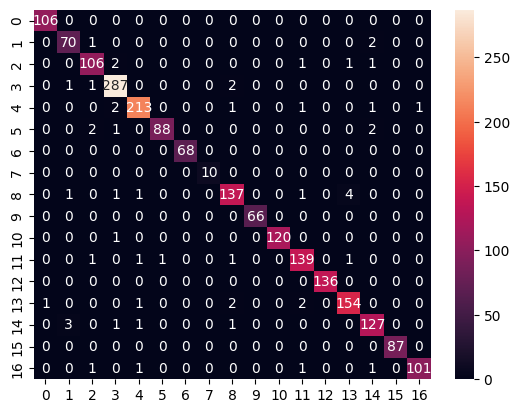

In [36]:
sns.heatmap(metrics.confusion_matrix(Y_test, predicted_val), annot=True, fmt="d")

In [37]:
pipe.predict(["My name is Jay"])

array(['English'], dtype=object)

In [39]:
pipe.predict(["Mi nombre es Juan"])

array(['Spanish'], dtype=object)

In [40]:
import pickle

In [46]:
new_file = open('model.pckl', 'wb')
pickle.dump(pipe, new_file)
new_file.close()

In [47]:
Y.value_counts()

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64